In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

In [5]:
photon_list=fits.open('photons_100GeV.fits')
photon_list.info()
photon_list[1].header

Filename: photons_100GeV.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    284   21917R x 50C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   53027R x 2C   [D, D]   


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  206 / width of table in bytes                        
NAXIS2  =                21917 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   50 / number of fields in each row                   
TTYPE1  = 'ENERGY  '           / energy of event                                
TFORM1  = 'E       '           / data format of field: 4-byte REAL              
TTYPE2  = 'RA      '           / right ascension (J2000) of event               
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'DEC     '        

In [8]:
photons=photon_list[1].data
print('There are overall',len(photons),'photons')

There are overall 21917 photons


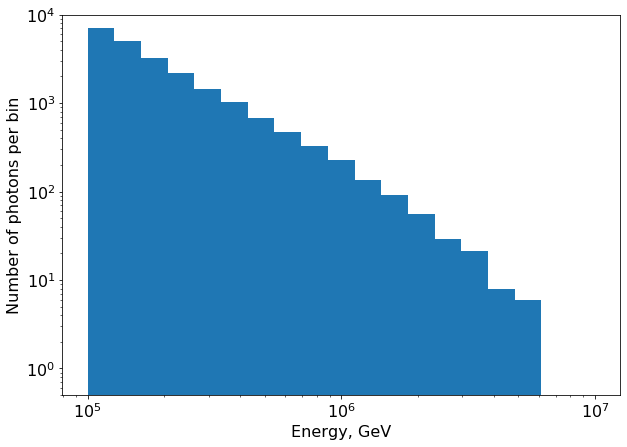

In [14]:
energy=photons['ENERGY']

plt.figure(figsize=(10,7))
plt.hist(energy,bins=np.logspace(5,7,20))
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.5,1e4)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Energy, GeV',fontsize=16)
plt.ylabel('Number of photons per bin',fontsize=16)

plt.savefig('Spectrum.png',format='png',dpi=100)



In [18]:
ra=photons['RA']
dec=photons['DEC']
l=photons['L']
b=photons['B']
time=photons['TIME']

l=(l>180)*(l-360)+(l<180)*l

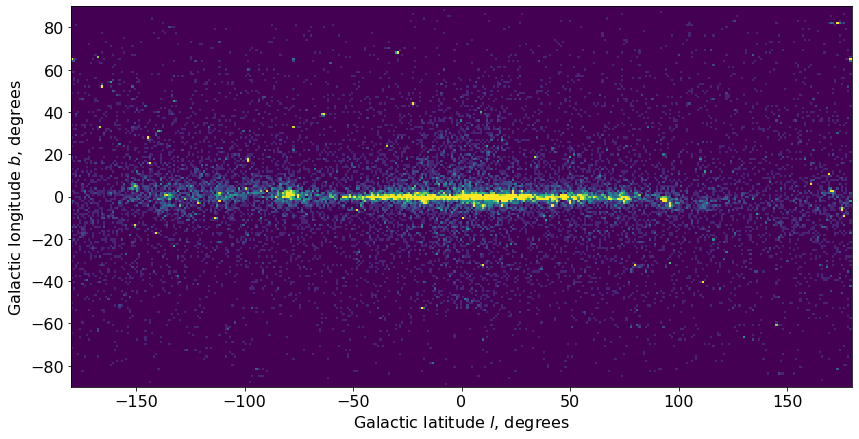

In [25]:
plt.figure(figsize=(14,7))
plt.hist2d(-l,b,bins=[np.linspace(-180,180,360),np.linspace(-90,90,180)],vmax=10)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Galactic latitude $l$, degrees',fontsize=16)
plt.ylabel('Galactic longitude $b$, degrees',fontsize=16)

plt.savefig('Map.png',format='png',dpi=100)


